In [4]:
import os
os.chdir("D:/Training/Academy/ML(Python)/Datasets")
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
dataset.dtypes

Review    object
Liked      int64
dtype: object

In [7]:
stops = stopwords.words('english')
stops

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [8]:
i=45
review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stops)]
review = ' '.join(review)
review

'thing like prime rib dessert section'

Code that cleans the text

In [ ]:
corpus = []
stops = stopwords.words('english')
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
corpus[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

Count Vectorization

In [11]:
cv = CountVectorizer(max_features = 800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = dataset['Liked']

In [12]:
X.head()

,absolut,acknowledg,actual,ad,ago,almost,also,although,alway,amaz,...,worth,would,wow,wrap,wrong,year,yet,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X.shape

(1000, 800)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3,
                                                    random_state = 25,  stratify=y)
classifier = RandomForestClassifier(random_state=25,n_estimators=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7533333333333333


In [14]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.79


TF-IDF Vectorization

In [26]:
cv = TfidfVectorizer(max_features = 800)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names_out())
y = dataset['Liked']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3,  random_state = 25,  stratify=y)
classifier = RandomForestClassifier(random_state=25,n_estimators=25)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7866666666666666


In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7933333333333333


Word Cloud

In [15]:
corpus2 = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus2.append(review)
print(corpus2[:6])

['wow loved place', 'crust good', 'tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great prices', 'getting angry want damn pho']


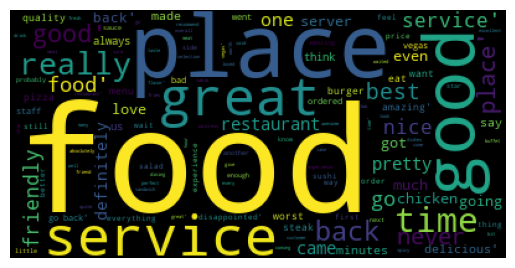

In [16]:
corp_str = str(corpus2)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [33]:
pos_rev = dataset[dataset['Liked']==1]
neg_rev = dataset[dataset['Liked']==0]

In [34]:
pos_rev['Review']

0                               Wow... Loved this place.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
8                              The fries were great too.
9                                         A great touch.
                             ...                        
901    Their regular toasted bread was equally satisf...
906    The chips and sals a here is amazing!!!!!!!!!!...
908                This is my new fav Vegas buffet spot.
921    Every time I eat here, I see caring teamwork t...
999                                   The food was good.
Name: Review, Length: 501, dtype: object

In [35]:
corp_pos = []
for i in range(0, pos_rev.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', pos_rev.iloc[i]['Review'])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corp_pos.append(review)
print(corp_pos[:6])

['wow loved place', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great prices', 'fries great', 'great touch', 'service prompt']


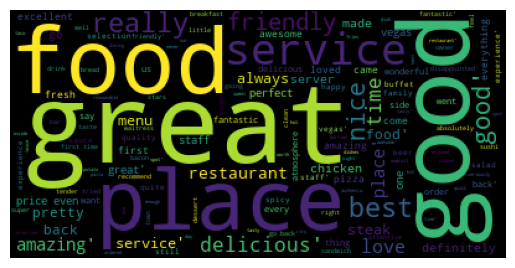

In [36]:
corp_str = str(corp_pos)
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

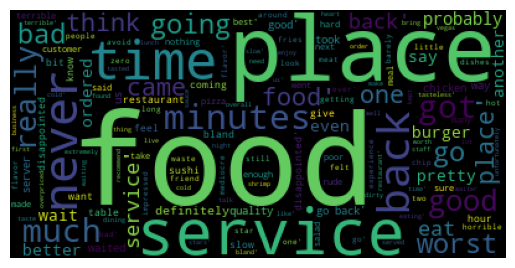

In [37]:
corp_neg = []
for i in range(0, neg_rev.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', neg_rev.iloc[i]['Review'])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stops)]
    review = ' '.join(review)
    corp_neg.append(review)
corp_str = str(corp_neg)
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()